In [7]:
from keras import backend as K
from keras.models import Model
from keras.models import model_from_json
import numpy as np
import os
import cv2
from PIL import Image
import glob
import matplotlib.pyplot as plt

In [12]:
class feature_extractor:
    def __init__(self, model_path, model_name, model_weights, img_width, img_height, root_imgs, print_mdl ):
        self.model_path = model_path
        self.model_name = model_name
        self.model_weights = model_weights
        self.img_width = img_width
        self.img_height = img_height
        self.list_imgs = glob.glob(root_imgs)
        
        # Loading images
        images = [Image.open(fn).convert('RGB') for fn in self.list_imgs]
        newImages = [im.resize([self.img_width, self.img_height]) for im in images]
        imagesAsArray = [np.array(im).astype(np.float32) for im in newImages]
        self.imgs = np.array([cv2.normalize(im.astype(np.float32),  np.zeros((self.img_width, self.img_height, 3), dtype=np.float32), -1, 1, cv2.NORM_MINMAX) for im in imagesAsArray], dtype=np.float32)
        
        # load json of the model
        json_file = open(os.path.join(self.model_path, self.model_name), 'r')
        loaded_model_json = json_file.read()
        json_file.close()

        # create the model
        self.model = model_from_json(loaded_model_json)
        if print_mdl:
            print(model.summary())

        # load the weights
        self.model.load_weights(os.path.join(self.model_path, self.model_weights))
        

            
    def extract_features(self, layer):            

        model_extractFeatures = Model(outputs=self.model.get_layer(layer).output, inputs=self.model.input )
        features = model_extractFeatures.predict(self.imgs)
        return features
        
        

In [13]:
model_path = '/home/cvblab03/Documents/fine-tuning_Chen/ModelsByFold_Chen/Chen/Fold0/'
model_name = 'Fold_0model.json'
model_weights = 'Fold_0Chen_Model_Batch8final_weights.h5'
img_width = 256
img_height = 256
root_imgs = 'croppedMESSIDOR/*'

In [14]:
extractor = feature_extractor(model_path, model_name, model_weights, img_width, img_height, root_imgs, print_mdl=False )

In [15]:
feats = extractor.extract_features('C1')
K.clear_session()

In [16]:
print(extractor.list_imgs[1])
print(feats.shape)

croppedMESSIDOR/20051205_58502_0400_PP.png
(1200, 246, 246, 96)


(246, 246)


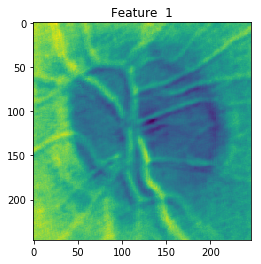

In [21]:
print(feats[1,:,:,1].shape)
plt.title('Feature  ' + str(1))
plt.imshow(feats[1,:,:,3])